In [20]:
#@title Import libraries
from google.colab import drive
drive.mount('/content/drive')



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, precision_recall_curve


path = '/content/drive/MyDrive/ weekly running injuries data/day_approach_maskedID_timeseries.csv'
day_injuries_data = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
print('Dimensions:', np.shape(day_injuries_data))
print('Number of Null Values:\n', np.sum(day_injuries_data.isnull()))

Dimensions: (42766, 73)
Number of Null Values:
 nr. sessions                   0
total km                       0
km Z3-4                        0
km Z5-T1-T2                    0
km sprinting                   0
                              ..
perceived trainingSuccess.6    0
perceived recovery.6           0
Athlete ID                     0
injury                         0
Date                           0
Length: 73, dtype: int64


In [22]:
day_injuries_data.head(15)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,km sprinting,strength training,hours alternative,perceived exertion,perceived trainingSuccess,perceived recovery,...,km Z5-T1-T2.6,km sprinting.6,strength training.6,hours alternative.6,perceived exertion.6,perceived trainingSuccess.6,perceived recovery.6,Athlete ID,injury,Date
0,1.0,5.8,0.0,0.6,1.2,0.0,0.00,0.11,0.00,0.18,...,0.0,0.0,0.0,1.0,0.10,0.00,0.15,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.5,1.2,0.0,0.0,0.10,0.00,0.17,0,0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,0.0,1.0,0.0,0.10,0.00,0.17,0,0,3
4,1.0,0.0,0.0,0.0,0.0,0.0,1.08,0.08,0.00,0.18,...,0.0,0.0,0.0,0.0,0.11,0.00,0.17,0,0,4
5,1.0,16.4,10.0,0.0,0.0,1.0,0.00,0.11,0.00,0.17,...,0.0,0.0,0.0,1.0,0.08,0.00,0.17,0,0,5
6,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.10,0.00,0.15,...,0.0,0.0,0.0,0.0,0.09,0.00,0.18,0,0,6
7,1.0,5.2,0.0,0.5,1.2,0.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,7
8,0.0,0.0,0.0,0.0,0.0,0.0,0.00,-0.01,-0.01,-0.01,...,0.0,1.2,0.0,0.0,0.11,0.00,0.18,0,0,8
9,1.0,0.0,0.0,0.0,0.0,1.0,0.00,0.10,0.00,0.17,...,0.0,0.0,0.0,0.0,-0.01,-0.01,-0.01,0,0,9


# Process Data

In [23]:
X = day_injuries_data.to_numpy()[:,:70]
np.shape(X)

(42766, 70)

In [24]:
y = day_injuries_data.to_numpy()[:,71]
print(y)
print(np.sum(y))

[0. 0. 0. ... 1. 1. 1.]
583.0


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)
x_rus, y_rus = rus.fit_resample(X_train, y_train)

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X_train, y_train)

# Plot Data Frequency

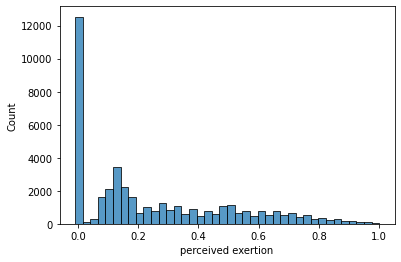

In [26]:
sns.histplot(data=day_injuries_data, x='perceived exertion')

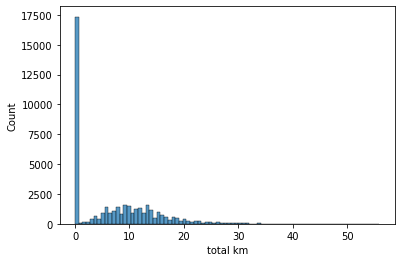

In [27]:
sns.histplot(data=day_injuries_data, x='total km')

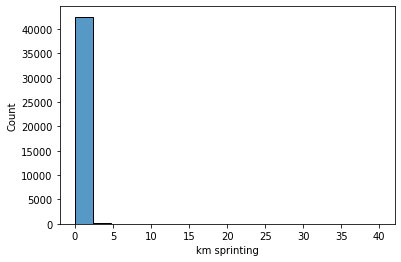

In [28]:
sns.histplot(data=day_injuries_data, x='km sprinting')

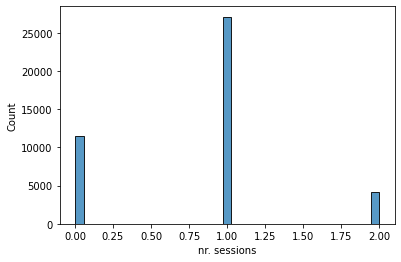

In [29]:
sns.histplot(data=day_injuries_data, x='nr. sessions')

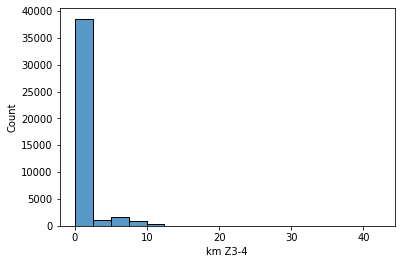

In [30]:
sns.histplot(data=day_injuries_data, x='km Z3-4')

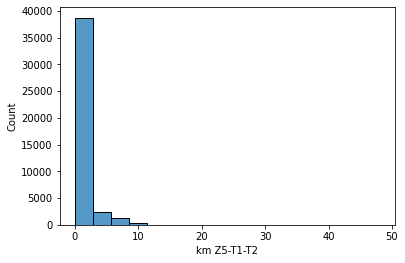

In [31]:
sns.histplot(data=day_injuries_data, x='km Z5-T1-T2')

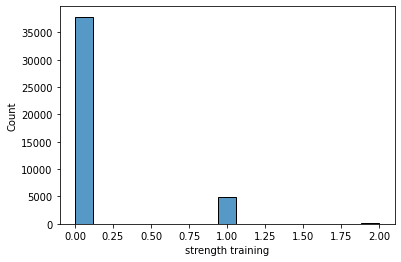

In [32]:
sns.histplot(data=day_injuries_data, x='strength training')

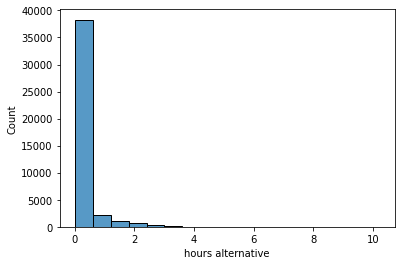

In [33]:
sns.histplot(data=day_injuries_data, x='hours alternative')

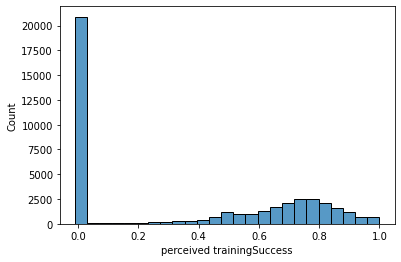

In [34]:
sns.histplot(data=day_injuries_data, x='perceived trainingSuccess')

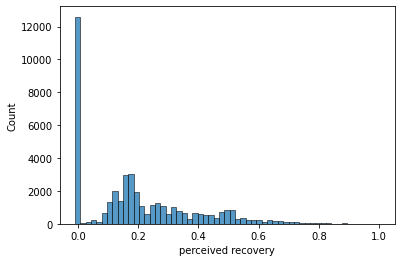

In [35]:
sns.histplot(data=day_injuries_data, x='perceived recovery')

# Train Baseline Models

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_

Accuracy Score: 0.9868206618011762
Precision Score: 0.0
Confusion Matrix: 
[[13927     2]
 [  184     0]]
Area Under Curve: 0.6416278049861566
Recall score: 0.0
F beta score: 0.0
F1 score: 0.0


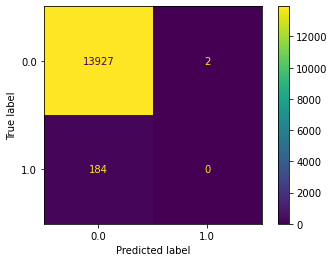

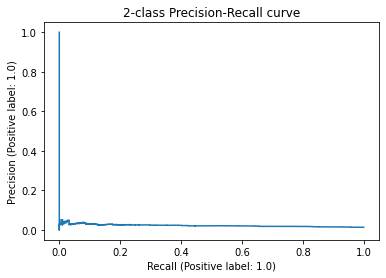

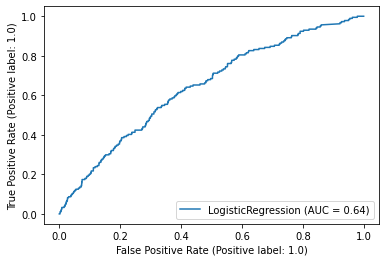

In [36]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
from sklearn.metrics import fbeta_score

lg1 = LogisticRegression()
lg1.fit(X_train, y_train)

y_pred = lg1.predict(X_test)
y_score = lg1.predict_proba(X_test)[:, 1]
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precision Score: {precision_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_score)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F beta score: {fbeta_score(y_test,y_pred, beta = 1.2)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
plot_confusion_matrix(lg1, X_test, y_test)
display1 = PrecisionRecallDisplay.from_estimator(lg1, X_test, y_test, name="Logistic Regression")
graph = display1.ax_.set_title("2-class Precision-Recall curve")
display1.ax_.get_legend().remove()
plot_roc_curve(lg1, X_test, y_test)

Random Forest Classifier Model Accuracy:  0.9869623751151421
F1 score:  0.0
Accuracy Score: 0.9869623751151421
Confusion Matrix: 
[[13929     0]
 [  184     0]]
Area Under Curve: 0.5
Precision Score: 0.0
Recall score: 0.0
F beta score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from

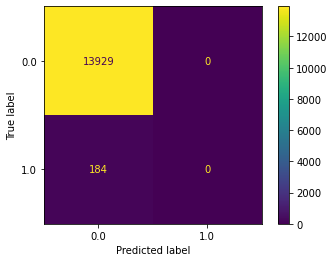

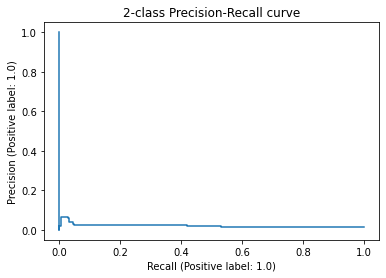

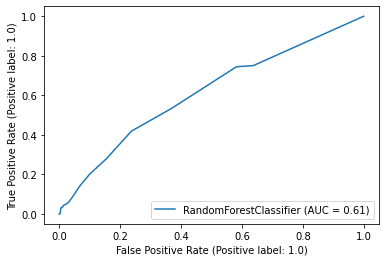

In [37]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)
forest_score = accuracy_score(y_test, forest_pred)
forest_score_f1 = f1_score(y_test, forest_pred)
print('Random Forest Classifier Model Accuracy: ', forest_score)
print('F1 score: ', forest_score_f1)
print(f'Accuracy Score: {accuracy_score(y_test,forest_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, forest_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, forest_pred)}')
print(f'Precision Score: {precision_score(y_test, forest_pred)}')
print(f'Recall score: {recall_score(y_test,forest_pred)}')
print(f'F beta score: {fbeta_score(y_test,forest_pred, beta = 1.2)}')
plot_confusion_matrix(forest_model, X_test, y_test)
display1 = PrecisionRecallDisplay.from_estimator(forest_model, X_test, y_test, name="Random Forest Classifier")
graph = display1.ax_.set_title("2-class Precision-Recall curve")
display1.ax_.get_legend().remove()
plot_roc_curve(forest_model, X_test, y_test)

##Hyperparameter Search

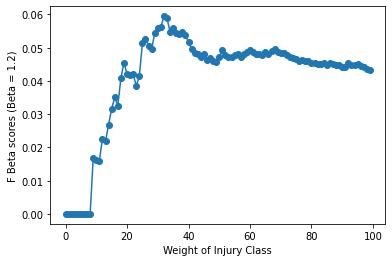

In [38]:
weights = np.zeros(100)
scores = np.zeros(100)
for i in range(100):
  w = {0:1, 1:i}
  lg2 = LogisticRegression(solver='newton-cg', class_weight=w)
  lg2.fit(X_train,y_train)
  y_pred = lg2.predict(X_test)
  scores[i] = fbeta_score(y_test,y_pred, beta = 1.2)
  weights[i] = i
#plt.scatter(weights,scores)
plt.plot(weights,scores,linestyle='-', marker='o')
plt.xlabel("Weight of Injury Class")
plt.ylabel("F Beta scores (Beta = 1.2)")
plt.legend('',frameon=False)
plt.show()

In [39]:
np.max(scores)
np.argmax(scores)

32

# Train Balanced Models

Accuracy Score: 0.9061857861546092
Precision Score: 0.0297029702970297
Confusion Matrix: 
[[12753  1176]
 [  148    36]]
Area Under Curve: 0.6359124847440591
Recall score: 0.1956521739130435
F1 score: 0.05157593123209169
F beta score: 0.05947351316217094


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


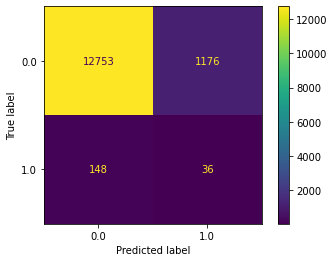

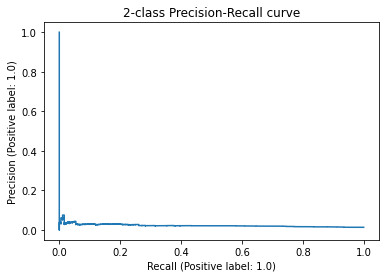

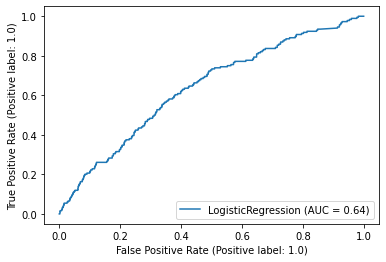

In [40]:
w = {0:1, 1:32}
lg2 = LogisticRegression(solver='newton-cg', class_weight=w)
lg2.fit(X_train,y_train)
y_pred = lg2.predict(X_test)
y_score = lg2.predict_proba(X_test)[:, 1]
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precision Score: {precision_score(y_test, y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_score)}')
print(f'Recall score: {recall_score(y_test, y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
print(f'F beta score: {fbeta_score(y_test,y_pred, beta = 1.2)}')
plot_confusion_matrix(lg2, X_test, y_test)
display1 = PrecisionRecallDisplay.from_estimator(lg2, X_test, y_test, name="Logistic Regression")
graph = display1.ax_.set_title("2-class Precision-Recall curve")
display1.ax_.get_legend().remove()
plot_roc_curve(lg2, X_test, y_test)

Accuracy score is: 0.9869623751151421
Accuracy Score: 0.9869623751151421
Confusion Matrix: 
[[13929     0]
 [  184     0]]
Area Under Curve: 0.5
Recall score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


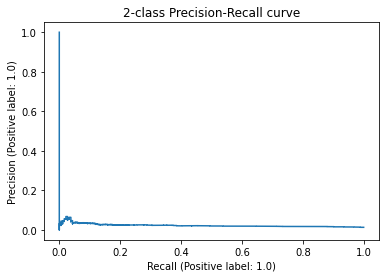

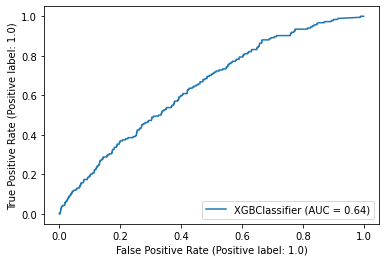

In [41]:
#@title Default title text
from xgboost import XGBClassifier

xgb_model = XGBClassifier().fit(X_train, y_train)

# predict
xgb_y_predict = xgb_model.predict(X_test)

# accuracy score
xgb_score = accuracy_score(xgb_y_predict, y_test)

print('Accuracy score is:', xgb_score)

print(f'Accuracy Score: {accuracy_score(y_test,xgb_y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, xgb_y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, xgb_y_predict)}')
print(f'Recall score: {recall_score(y_test,xgb_y_predict)}')
display1 = PrecisionRecallDisplay.from_estimator(xgb_model, X_test, y_test, name="Logistic Regression")
graph = display1.ax_.set_title("2-class Precision-Recall curve")
display1.ax_.get_legend().remove()
plot_roc_curve(xgb_model, X_test, y_test)


Accuracy Score: 0.02380783674626231
Precision Score: 0.013179571663920923
Confusion Matrix: 
[[  152 13777]
 [    0   184]]
Area Under Curve: 0.6320368514859521
Recall score: 1.0
F1 score: 0.026016260162601626


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


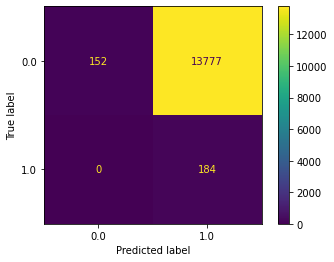

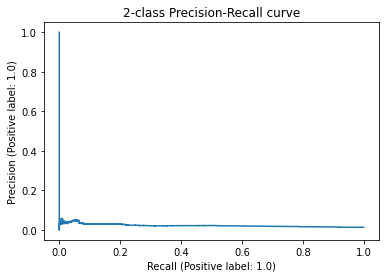

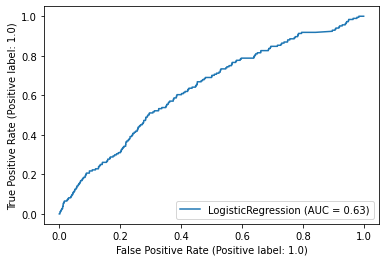

In [42]:
#@title Default title text
w = {0:1, 1:10}
lg2 = LogisticRegression(solver='newton-cg', class_weight=w)
lg2.fit(x_ros, y_ros)
y_pred = lg2.predict(X_test)
y_score = lg2.predict_proba(X_test)[:, 1]
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precision Score: {precision_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_score)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
plot_confusion_matrix(lg2, X_test, y_test)
display1 = PrecisionRecallDisplay.from_estimator(lg2, X_test, y_test, name="Logistic Regression")
graph = display1.ax_.set_title("2-class Precision-Recall curve")
display1.ax_.get_legend().remove()
plot_roc_curve(lg2, X_test, y_test)


Accuracy Score: 0.028838659392049885
Precision Score: 0.01317684331797235
Confusion Matrix: 
[[  224 13705]
 [    1   183]]
Area Under Curve: 0.6100706377373449
Recall score: 0.9945652173913043
F1 score: 0.02600909607731666


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


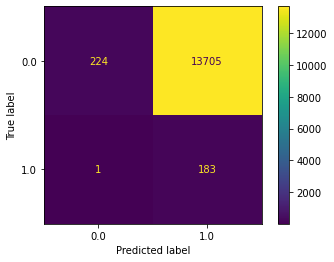

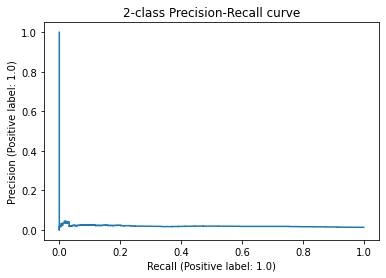

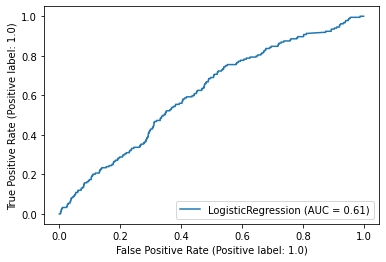

In [43]:
#@title Default title text
w = {0:1, 1:10}
lg2 = LogisticRegression(solver='newton-cg', class_weight=w)
lg2.fit(x_rus,y_rus)
y_pred = lg2.predict(X_test)
y_score = lg2.predict_proba(X_test)[:, 1]
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
print(f'Precision Score: {precision_score(y_test,y_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_score)}')
print(f'Recall score: {recall_score(y_test,y_pred)}')
print(f'F1 score: {f1_score(y_test,y_pred)}')
plot_confusion_matrix(lg2, X_test, y_test)
display1 = PrecisionRecallDisplay.from_estimator(lg2, X_test, y_test, name="Logistic Regression")
graph = display1.ax_.set_title("2-class Precision-Recall curve")
display1.ax_.get_legend().remove()
plot_roc_curve(lg2, X_test, y_test)


Random Forest Classifier Model Accuracy:  0.9869623751151421
F1 score:  0.0
Precision Score: 0.0
Accuracy Score: 0.9869623751151421
Confusion Matrix: 
[[13929     0]
 [  184     0]]
Area Under Curve: 0.5
Recall score: 0.0
F beta score: 0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from

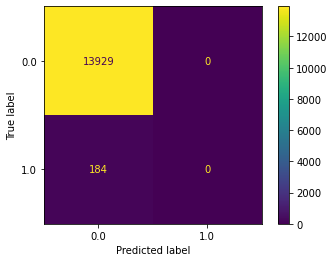

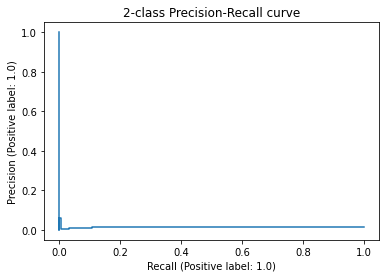

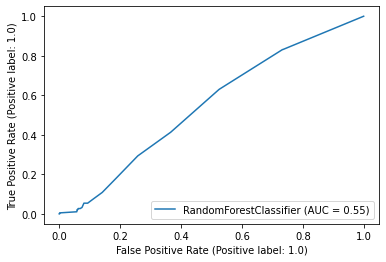

In [44]:
forest_model = RandomForestClassifier()
forest_model.fit(x_ros, y_ros)
forest_pred = forest_model.predict(X_test)
forest_score = accuracy_score(y_test, forest_pred)
forest_score_f1 = f1_score(y_test, forest_pred)
print('Random Forest Classifier Model Accuracy: ', forest_score)
print('F1 score: ', forest_score_f1)
print(f'Precision Score: {precision_score(y_test,forest_pred)}')
print(f'Accuracy Score: {accuracy_score(y_test,forest_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, forest_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, forest_pred)}')
print(f'Recall score: {recall_score(y_test,forest_pred)}')
print(f'F beta score: {fbeta_score(y_test,forest_pred, beta = 1.2)}')
plot_confusion_matrix(forest_model, X_test, y_test)
display1 = PrecisionRecallDisplay.from_estimator(forest_model, X_test, y_test, name="Logistic Regression")
graph = display1.ax_.set_title("2-class Precision-Recall curve")
display1.ax_.get_legend().remove()
plot_roc_curve(forest_model, X_test, y_test)

Random Forest Classifier Model Accuracy:  0.5854885566498973
F1 score:  0.03560830860534125
Accuracy Score: 0.5854885566498973
Confusion Matrix: 
[[8155 5774]
 [  76  108]]
Area Under Curve: 0.586212843395231
Precision Score: 0.018361101666099965
Recall score: 0.5869565217391305
F beta score: 0.042869971498106375


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


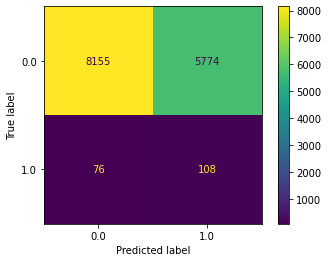

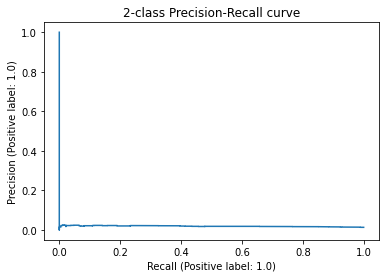

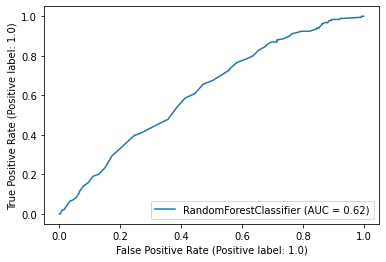

In [45]:
forest_model = RandomForestClassifier()
forest_model.fit(x_rus, y_rus)
forest_pred = forest_model.predict(X_test)
forest_score = accuracy_score(y_test, forest_pred)
forest_score_f1 = f1_score(y_test, forest_pred)
print('Random Forest Classifier Model Accuracy: ', forest_score)
print('F1 score: ', forest_score_f1)
print(f'Accuracy Score: {accuracy_score(y_test,forest_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, forest_pred)}')
print(f'Area Under Curve: {roc_auc_score(y_test, forest_pred)}')
print(f'Precision Score: {precision_score(y_test,forest_pred)}')
print(f'Recall score: {recall_score(y_test,forest_pred)}')
print(f'F beta score: {fbeta_score(y_test,forest_pred, beta = 1.2)}')
plot_confusion_matrix(forest_model, X_test, y_test)
display1 = PrecisionRecallDisplay.from_estimator(forest_model, X_test, y_test, name="Logistic Regression")
graph = display1.ax_.set_title("2-class Precision-Recall curve")
display1.ax_.get_legend().remove()
plot_roc_curve(forest_model, X_test, y_test)